# STEP #0: PROBLEM STATEMENT  

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we are going to use a trained ANN known as MobileNet that come readily trained/available from TF 2.0 Hub
- We are going to use TensorFlow Flowers dataset 
- This code is based on TensorFlow 2.0 Hub documentation: 
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras


# STEP #1: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [2]:
!pip install tensorflow_hub
import tensorflow_hub as hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# STEP #2: IMPORT MOBILENET WITH PRE-TRAINED WEIGHTS FROM TF 2.0 HUB

In [3]:
Trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [4]:
Trained_MobileNet = tf.keras.Sequential([
    hub.KerasLayer(Trained_MobileNet_url, input_shape=(224,224,3))
    ])

# STEP #3: EVALUATE PRE-TRAINED MOBILENET (JUST TO BE SURE :)!)

- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'watch.jpg', target_size = (224, 224))

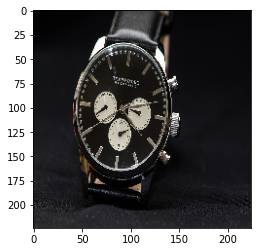

In [6]:
plt.imshow(Sample_Image)

In [7]:
Sample_Image = np.array(Sample_Image)/255.0

In [8]:
predicted_class = Trained_MobileNet.predict(np.expand_dims(Sample_Image, axis = 0))

1/1 [==============================] - 8s 8s/step


In [9]:
predicted_class

array([[ 0.31979933,  0.72271794, -0.46497577, ...,  0.253696  ,
        -1.4674318 , -0.0016138 ]], dtype=float32)

In [10]:
predicted_class.shape

(1, 1001)

In [11]:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Predicted Class is: Stopwatch')

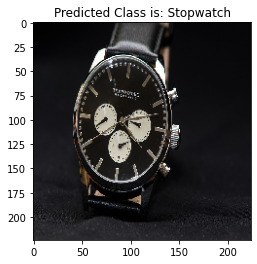

In [13]:
plt.imshow(Sample_Image)
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Predicted Class is: " + predicted_class_name.title())

# STEP #4: LET'S TEST THE MODEL ON A BATCH OF IMAGES

In [14]:
# Specify path of the flowers dataset
flowers_data_url = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [15]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flowers_data = image_generator.flow_from_directory(str(flowers_data_url), target_size=(224,224), batch_size = 64, shuffle = True)

Found 3670 images belonging to 5 classes.


In [16]:
for flowers_data_input_batch, flowers_data_label_batch in flowers_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [17]:
predictions_batch = Trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

2/2 [==============================] - 1s 14ms/step


(64, 1001)

In [18]:
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['daisy', 'daisy', 'daisy', 'sea urchin', 'fly',
       "yellow lady's slipper", 'bee', 'daisy', 'mushroom', 'daisy',
       'daisy', 'agaric', 'daisy', 'velvet', 'picket fence', 'bee',
       'daisy', 'daisy', 'hip', 'sea anemone', 'daisy', 'greenhouse',
       'puffer', 'daisy', 'daisy', 'daisy', 'pot', 'daisy', 'wool',
       'spider web', 'rapeseed', 'sunglasses', 'rapeseed', 'daisy',
       'cardoon', 'mushroom', 'daisy', 'rapeseed', 'buckeye',
       'sea urchin', 'daisy', 'tractor', 'daisy', 'daisy', 'lawn mower',
       'daisy', "jack-o'-lantern", 'hip', 'daisy', 'sea urchin',
       'Sealyham terrier', 'daisy', 'spider web', 'daisy', 'bee', 'daisy',
       'rapeseed', 'bee', 'daisy', 'sweatshirt', 'daisy', 'buckeye',
       'coral fungus', 'rapeseed'], dtype='<U30')

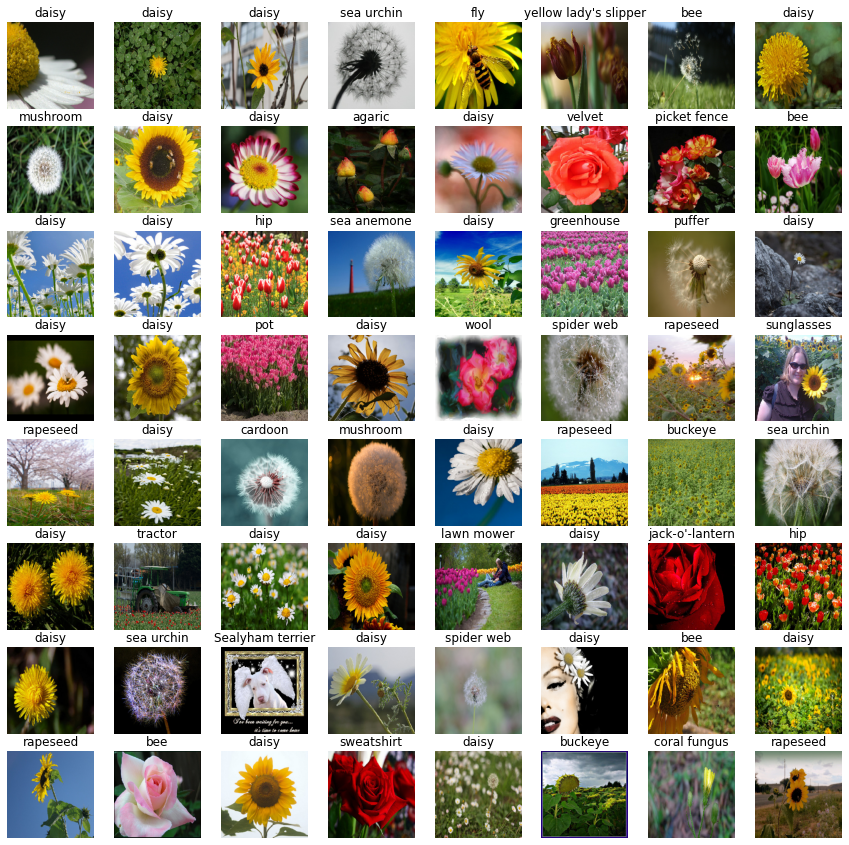

In [19]:
plt.figure(figsize=(15,15))

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

# Network performance is poor because it wasn't even trained to clasify these types of flowers!

# STEP #5: APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

You can download the MobileNet without the classification head:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2


In [20]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [21]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224, 224, 3))

In [22]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
print(feature_batch.shape)

(64, 1280)


In [23]:
MobileNet_feature_extractor_layer.trainable = False

In [24]:
flowers_data.num_classes

5

In [25]:
# Build a model with two pieces:
#    (1)  MobileNet Feature Extractor 
#    (2)  Dense Network (classifier) added at the end 

model = tf.keras.Sequential([
  MobileNet_feature_extractor_layer,
  tf.keras.layers.Dense(flowers_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
predictions = model(flowers_data_input_batch)

In [27]:
predictions.shape

TensorShape([64, 5])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit_generator(flowers_data, epochs=50)

<ipython-input-29-0fd228724f37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(flowers_data, epochs=50)


Epoch 1/50
58/58 [==============================] - 15s 210ms/step - loss: 0.8099 - accuracy: 0.7000
Epoch 2/50
58/58 [==============================] - 12s 204ms/step - loss: 0.3914 - accuracy: 0.8730
Epoch 3/50
58/58 [==============================] - 12s 206ms/step - loss: 0.3111 - accuracy: 0.8986
Epoch 4/50
58/58 [==============================] - 12s 204ms/step - loss: 0.2637 - accuracy: 0.9177
Epoch 5/50
58/58 [==============================] - 12s 208ms/step - loss: 0.2314 - accuracy: 0.9294
Epoch 6/50
58/58 [==============================] - 12s 206ms/step - loss: 0.2078 - accuracy: 0.9381
Epoch 7/50
58/58 [==============================] - 12s 208ms/step - loss: 0.1836 - accuracy: 0.9477
Epoch 8/50
58/58 [==============================] - 13s 218ms/step - loss: 0.1693 - accuracy: 0.9553
Epoch 9/50
58/58 [==============================] - 12s 205ms/step - loss: 0.1562 - accuracy: 0.9605
Epoch 10/50
58/58 [==============================] - 12s 207ms/step - loss: 0.1418 - accura

# STEP #6: EVALUATE THE MODEL

In [30]:
class_names = sorted(flowers_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [31]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

2/2 [==============================] - 0s 48ms/step


In [32]:
label_id = np.argmax(flowers_data_label_batch, axis=-1)

In [33]:
label_id

array([0, 1, 3, 1, 1, 4, 1, 1, 1, 3, 0, 2, 0, 2, 2, 4, 0, 0, 4, 1, 3, 4,
       1, 0, 0, 3, 4, 3, 2, 1, 3, 3, 1, 0, 1, 1, 0, 4, 3, 1, 1, 4, 0, 3,
       4, 0, 2, 4, 1, 1, 2, 0, 1, 0, 3, 3, 3, 2, 3, 2, 1, 3, 1, 3])

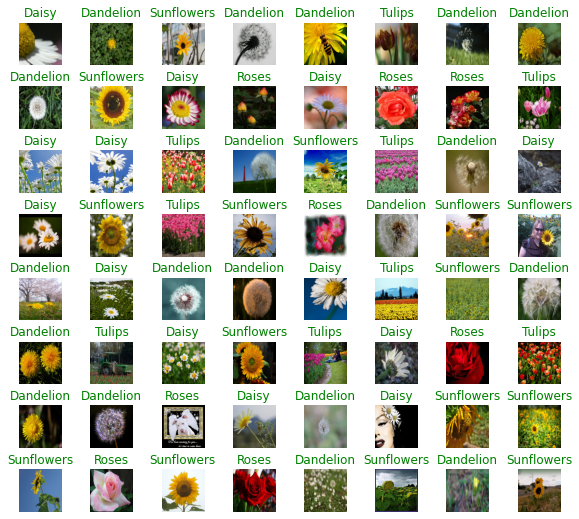

In [34]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
